In [34]:
import numpy as np
import pandas as pd
import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import community as community_louvain
from mpl_toolkits.mplot3d import Axes3D

from mi_modulo import *

Vamos a hacer un aanalisis de los ensayos motores (numeros nones) y los imaginarios (pares) para ver cuales son los nodos que se activan mas con la imaginaria vamos a poner th, y porcentajes relativamente altos en la norma para ver solo lo snodos mas importantes , en total analisamos los 13 y vamos a poner la grafica unica de motores y imaginarios

In [35]:
#Definiendo rutas de archivos

ensayo2_excel = r"C:\Users\JO\Documents\ModelosC1\data\eeg-motor-movementimagery_Ensayo_02.xlsx"  #basal

#Motor numeros nones
ensayo3_excel = r"C:\Users\JO\Documents\ModelosC1\data\eeg-motor-movementimagery_Ensayo_03.xlsx"
ensayo5_excel = r"C:\Users\JO\Documents\ModelosC1\data\eeg-motor-movementimagery_Ensayo_05.xlsx"
ensayo7_excel = r"C:\Users\JO\Documents\ModelosC1\data\eeg-motor-movementimagery_Ensayo_07.xlsx"
ensayo9_excel = r"C:\Users\JO\Documents\ModelosC1\data\eeg-motor-movementimagery_Ensayo_09.xlsx"
ensayo11_excel = r"C:\Users\JO\Documents\ModelosC1\data\eeg-motor-movementimagery_Ensayo_11.xlsx"
ensayo13_excel = r"C:\Users\JO\Documents\ModelosC1\data\eeg-motor-movementimagery_Ensayo_13.xlsx"
ensayo14_excel = r"C:\Users\JO\Documents\ModelosC1\data\eeg-motor-movementimagery_Ensayo_14.xlsx"

#imaginaria
ensayo4_excel = r"C:\Users\JO\Documents\ModelosC1\data\eeg-motor-movementimagery_Ensayo_04.xlsx"
ensayo6_excel = r"C:\Users\JO\Documents\ModelosC1\data\eeg-motor-movementimagery_Ensayo_06.xlsx"
ensayo8_excel = r"C:\Users\JO\Documents\ModelosC1\data\eeg-motor-movementimagery_Ensayo_08.xlsx"
ensayo10_excel = r"C:\Users\JO\Documents\ModelosC1\data\eeg-motor-movementimagery_Ensayo_10.xlsx"
ensayo12_excel = r"C:\Users\JO\Documents\ModelosC1\data\eeg-motor-movementimagery_Ensayo_12.xlsx"
ensayo14_excel = r"C:\Users\JO\Documents\ModelosC1\data\eeg-motor-movementimagery_Ensayo_14.xlsx"
coordenadas_csv = r"C:\Users\JO\Documents\ModelosC1\data\MI_coordinates.csv"  #cargamos las coordenadas de donde serqan los eelctrodos


# Leemos archivo xlsx de ensayo con 109 sujetos

ensayo2_dict = pd.read_excel(ensayo2_excel, sheet_name=None, index_col=0)
ensayo3_dict = pd.read_excel(ensayo3_excel, sheet_name=None, index_col=0)
ensayo4_dict = pd.read_excel(ensayo4_excel, sheet_name=None, index_col=0)
ensayo5_dict = pd.read_excel(ensayo5_excel, sheet_name=None, index_col=0)
ensayo6_dict = pd.read_excel(ensayo6_excel, sheet_name=None, index_col=0)
ensayo7_dict = pd.read_excel(ensayo7_excel,  sheet_name=None, index_col=0)
ensayo8_dict = pd.read_excel(ensayo8_excel,  sheet_name=None, index_col=0)
ensayo9_dict = pd.read_excel(ensayo9_excel,  sheet_name=None, index_col=0)
ensayo10_dict = pd.read_excel(ensayo10_excel, sheet_name=None, index_col=0)
ensayo11_dict = pd.read_excel(ensayo11_excel, sheet_name=None, index_col=0)
ensayo12_dict = pd.read_excel(ensayo12_excel, sheet_name=None, index_col=0)
ensayo13_dict = pd.read_excel(ensayo13_excel, sheet_name=None, index_col=0)
ensayo14_dict = pd.read_excel(ensayo14_excel, sheet_name=None, index_col=0)

#el pd.read lee excel , sheet name cargamod todas las hojas de excel
#index_col=0  quiere decir que la primera columna sera usada como indice


In [36]:
# Creamos una lista de matrices de conectividad por sujeto
ensayos3_dfs = lista_dfs(ensayo3_dict)
ensayos4_dfs = lista_dfs(ensayo4_dict)
ensayos5_dfs = lista_dfs(ensayo5_dict)
ensayos6_dfs = lista_dfs(ensayo6_dict)
ensayos7_dfs  = lista_dfs(ensayo7_dict)
ensayos8_dfs  = lista_dfs(ensayo8_dict)
ensayos9_dfs  = lista_dfs(ensayo9_dict)
ensayos10_dfs = lista_dfs(ensayo10_dict)
ensayos11_dfs = lista_dfs(ensayo11_dict)
ensayos12_dfs = lista_dfs(ensayo12_dict)
ensayos13_dfs = lista_dfs(ensayo13_dict)
ensayos14_dfs = lista_dfs(ensayo14_dict)


In [37]:
# Creamos una matriz de conectividad a partir de la lista de 109 sujetos
resultado3_df = capsula(ensayos3_dfs, 0.58, 0.7)
resultado4_df = capsula(ensayos4_dfs, 0.58, 0.7)
resultado5_df = capsula(ensayos5_dfs, 0.58, 0.7)
resultado6_df = capsula(ensayos6_dfs, 0.58, 0.7)
resultado7_df = capsula(ensayos7_dfs, 0.58, 0.7)
resultado8_df = capsula(ensayos8_dfs, 0.58, 0.7)
resultado9_df = capsula(ensayos9_dfs, 0.58, 0.7)
resultado10_df = capsula(ensayos10_dfs, 0.58, 0.7)
resultado11_df = capsula(ensayos11_dfs, 0.58, 0.7)
resultado12_df = capsula(ensayos12_dfs, 0.58, 0.7)
resultado13_df = capsula(ensayos13_dfs, 0.58, 0.7)
resultado14_df = capsula(ensayos14_dfs, 0.58, 0.7)



# Generar estadísticos para decidir umbrales 

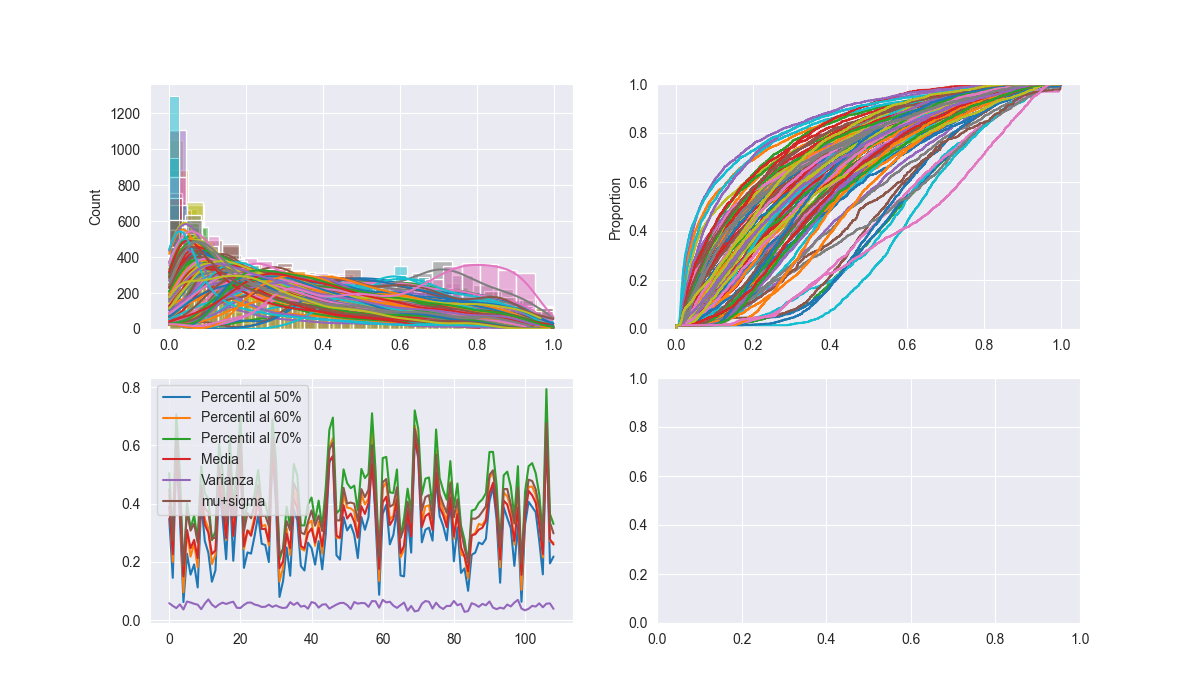

In [38]:
# Análisis para ensayo3
ensayos_dfs = ensayos3_dfs

th50, th60, th70, promedio, varianza = [], [], [], [], []
mu_sigma = []

fig, axes = plt.subplots(2, 2, figsize=(12, 7))
for sujeto in ensayos_dfs:
    # Calculo de estadísticos
    data = sujeto.stack().values
    th50.append(np.percentile(data, 50))
    th60.append(np.percentile(data, 60))
    th70.append(np.percentile(data, 70))
    promedio.append(np.mean(data))
    varianza.append(np.var(data))
    mu_sigma.append(np.mean(data) + np.var(data))

    # Plots
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)
    sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])
axes[1][0].plot(th50, label='Percentil al 50%')
axes[1][0].plot(th60, label='Percentil al 60%')
axes[1][0].plot(th70, label='Percentil al 70%')
axes[1][0].plot(promedio, label='Media')
axes[1][0].plot(varianza, label='Varianza')
axes[1][0].plot(mu_sigma, label='mu+sigma')
axes[1][0].legend()


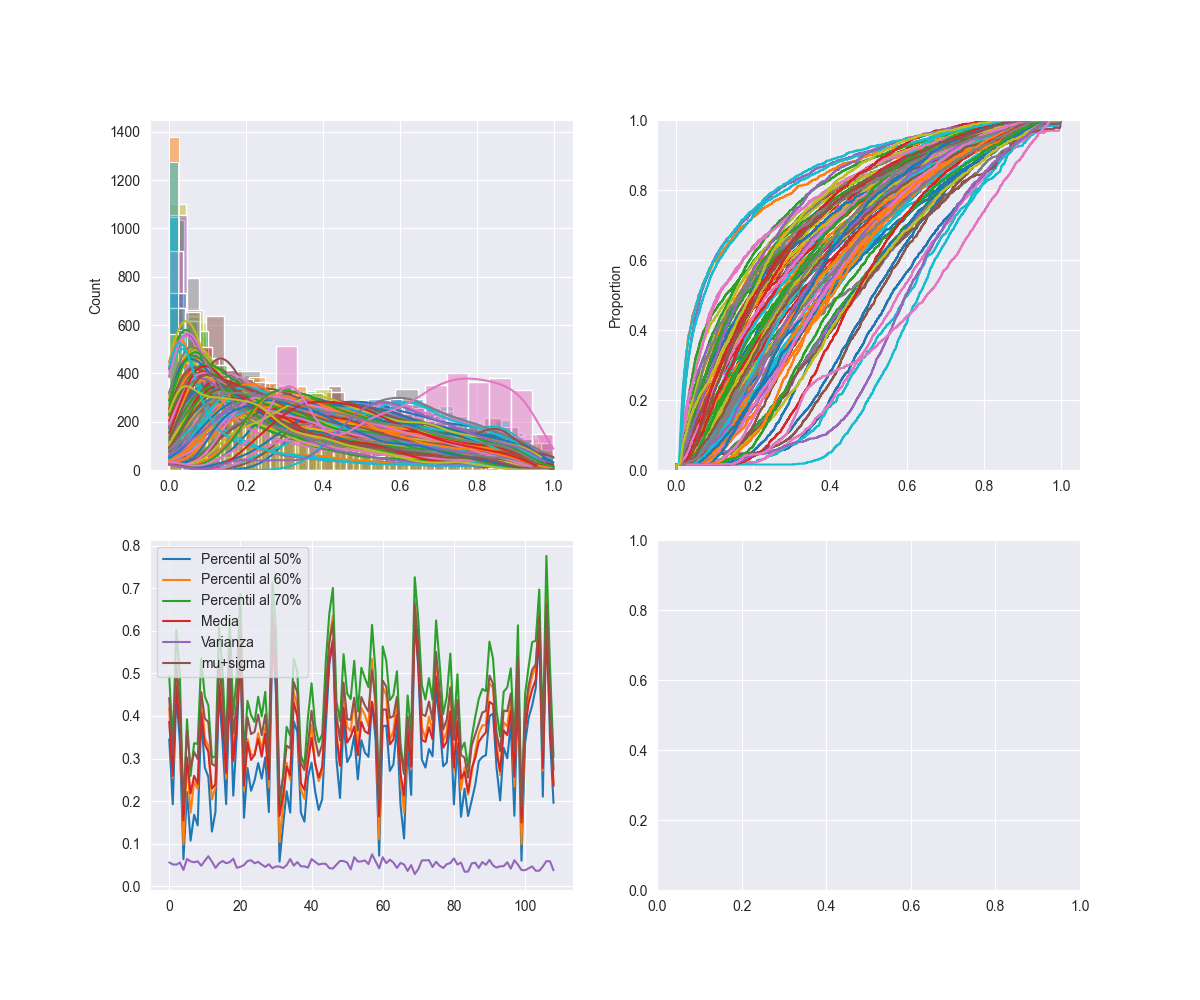

In [39]:
# Análisis para ensayo 5
ensayos_dfs = ensayos5_dfs

th25, th50, th75, promedio, varianza = [], [], [], [], []
mu_sigma = []

th50, th60, th70, promedio, varianza = [], [], [], [], []
mu_sigma = []

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for sujeto in ensayos_dfs:
    # Calculo de estadísticos
    data = sujeto.stack().values
    th50.append(np.percentile(data, 50))
    th60.append(np.percentile(data, 60))
    th70.append(np.percentile(data, 70))
    promedio.append(np.mean(data))
    varianza.append(np.var(data))
    mu_sigma.append(np.mean(data) + np.var(data))

    # Plots
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)
    sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])
axes[1][0].plot(th50, label='Percentil al 50%')
axes[1][0].plot(th60, label='Percentil al 60%')
axes[1][0].plot(th70, label='Percentil al 70%')
axes[1][0].plot(promedio, label='Media')
axes[1][0].plot(varianza, label='Varianza')
axes[1][0].plot(mu_sigma, label='mu+sigma')
axes[1][0].legend()

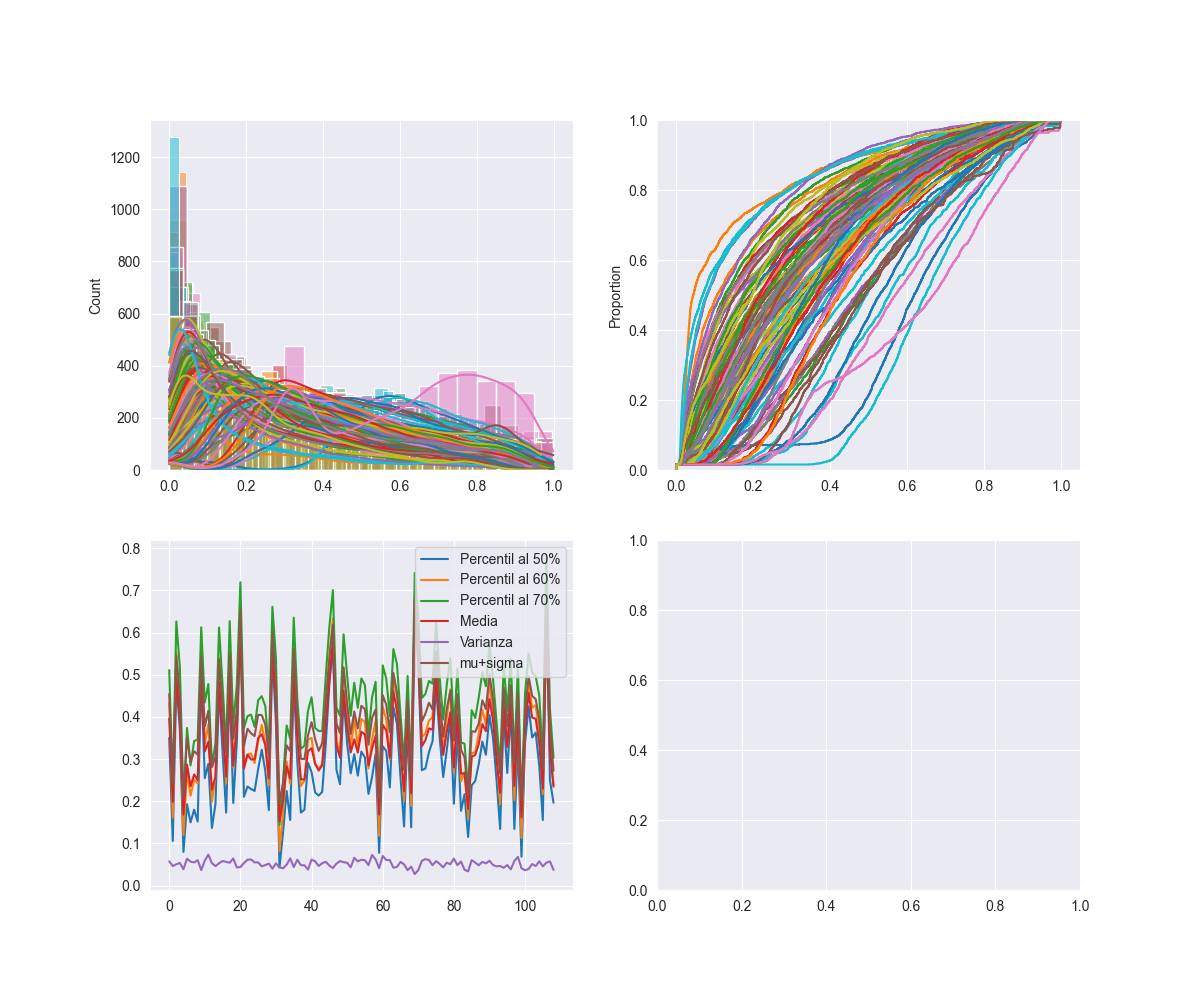

In [40]:
# Análisis para ensayo 6
ensayos_dfs = ensayos6_dfs

th25, th50, th75, promedio, varianza = [], [], [], [], []
mu_sigma = []

th50, th60, th70, promedio, varianza = [], [], [], [], []
mu_sigma = []

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for sujeto in ensayos_dfs:
    # Calculo de estadísticos
    data = sujeto.stack().values
    th50.append(np.percentile(data, 50))
    th60.append(np.percentile(data, 60))
    th70.append(np.percentile(data, 70))
    promedio.append(np.mean(data))
    varianza.append(np.var(data))
    mu_sigma.append(np.mean(data) + np.var(data))

    # Plots
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)
    sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])
axes[1][0].plot(th50, label='Percentil al 50%')
axes[1][0].plot(th60, label='Percentil al 60%')
axes[1][0].plot(th70, label='Percentil al 70%')
axes[1][0].plot(promedio, label='Media')
axes[1][0].plot(varianza, label='Varianza')
axes[1][0].plot(mu_sigma, label='mu+sigma')
axes[1][0].legend()

In [41]:
from scipy import stats

In [42]:
estadisticos_df = pd.DataFrame(columns=['th50', 'th60', 'th70', 'promedio', 'mu_sigma'],  ##creamos  una tabla vacía 5 x 4
                               index=['min', 'max', 'mediana', 'cosa_rara'])

columnas = [th50, th60, th70, promedio, mu_sigma]

min_, max_, mediana_, cosa_ = [], [], [], []  ##creas las listas para despues meter
for idx, columna in enumerate(estadisticos_df.columns):
    d1, d2, d3, d4 = np.min(columnas[idx]), np.max(columnas[idx]), np.median(columnas[idx]), stats.median_abs_deviation(columnas[idx])## calculas el pedo
    estadisticos_df[columna] = [d1, d2, d3, d4]

In [43]:
for i, col in enumerate(columnas):
    print(i, estadisticos_df.columns[i], len(col))


0 th50 109
1 th60 109
2 th70 109
3 promedio 109
4 mu_sigma 109


In [44]:
estadisticos_df

th50      th60      th70  promedio  mu_sigma
min        0.043536  0.081616  0.144126  0.153129  0.196388
max        0.667679  0.726243  0.781991  0.649729  0.677091
mediana    0.276807  0.346429  0.445083  0.333420  0.389303
cosa_rara  0.074638  0.076483  0.071036  0.058393  0.058424

Text(0.5, 0.98, 'Análisis para valor de umbral al 60% de la población en el ensayo 3')

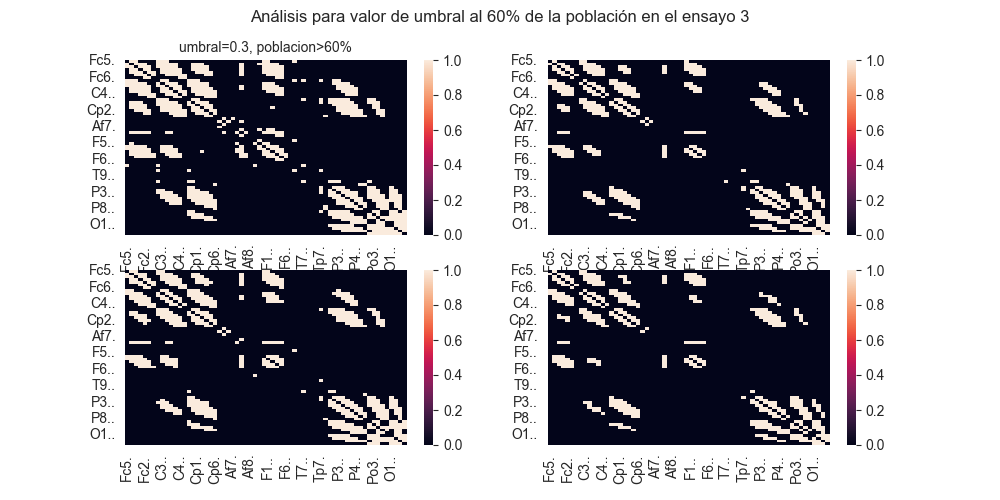

In [45]:
# Análisis para valor de umbral al 60% de la población en el ensayo 3
resultado3_df1 = capsula(ensayos3_dfs, 0.5, 0.6)
resultado3_df2 = capsula(ensayos3_dfs, 0.55, 0.7)
resultado3_df3 = capsula(ensayos3_dfs, 0.5, 0.7)
resultado3_df4 = capsula(ensayos3_dfs, 0.58, 0.7)

fig, axes = plt.subplots(2, 2, figsize=(10, 5))

sns.heatmap(resultado3_df1, ax=axes[0, 0])
sns.heatmap(resultado3_df2, ax=axes[0, 1])
sns.heatmap(resultado3_df3, ax=axes[1, 0])
sns.heatmap(resultado3_df4, ax=axes[1, 1])
# plt.title('Mapas de calor para comparativa de umbrales')
axes[0, 0].set_title('umbral=0.3, poblacion>60%', fontsize=10)
fig.suptitle('Análisis para valor de umbral al 60% de la población en el ensayo 3')

Text(0.5, 0.98, 'Análisis para valor de umbral al 60% de la población en el ensayo 4')

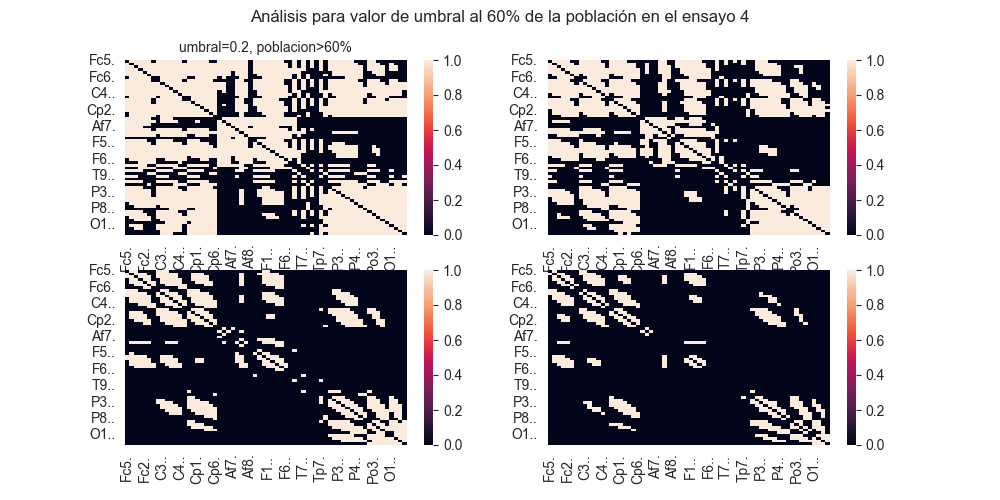

In [46]:
# Análisis para valor de umbral al 60% de la población en el ensayo 4

resultado4_df1 = capsula(ensayos4_dfs, 0.2, 0.6)
resultado4_df2 = capsula(ensayos4_dfs, 0.3, 0.6)
resultado4_df3 = capsula(ensayos4_dfs, 0.5, 0.6)
resultado4_df4 = capsula(ensayos4_dfs, 0.58, 0.7)

fig, axes = plt.subplots(2, 2, figsize=(10, 5))

sns.heatmap(resultado4_df1, ax=axes[0, 0])
sns.heatmap(resultado4_df2, ax=axes[0, 1])
sns.heatmap(resultado4_df3, ax=axes[1, 0])
sns.heatmap(resultado4_df4, ax=axes[1, 1])
# plt.title('Mapas de calor para comparativa de umbrales')
axes[0, 0].set_title('umbral=0.2, poblacion>60%', fontsize=10)
fig.suptitle('Análisis para valor de umbral al 60% de la población en el ensayo 4')

Text(0.5, 0.98, 'Análisis para valor de umbral ensayo 5')

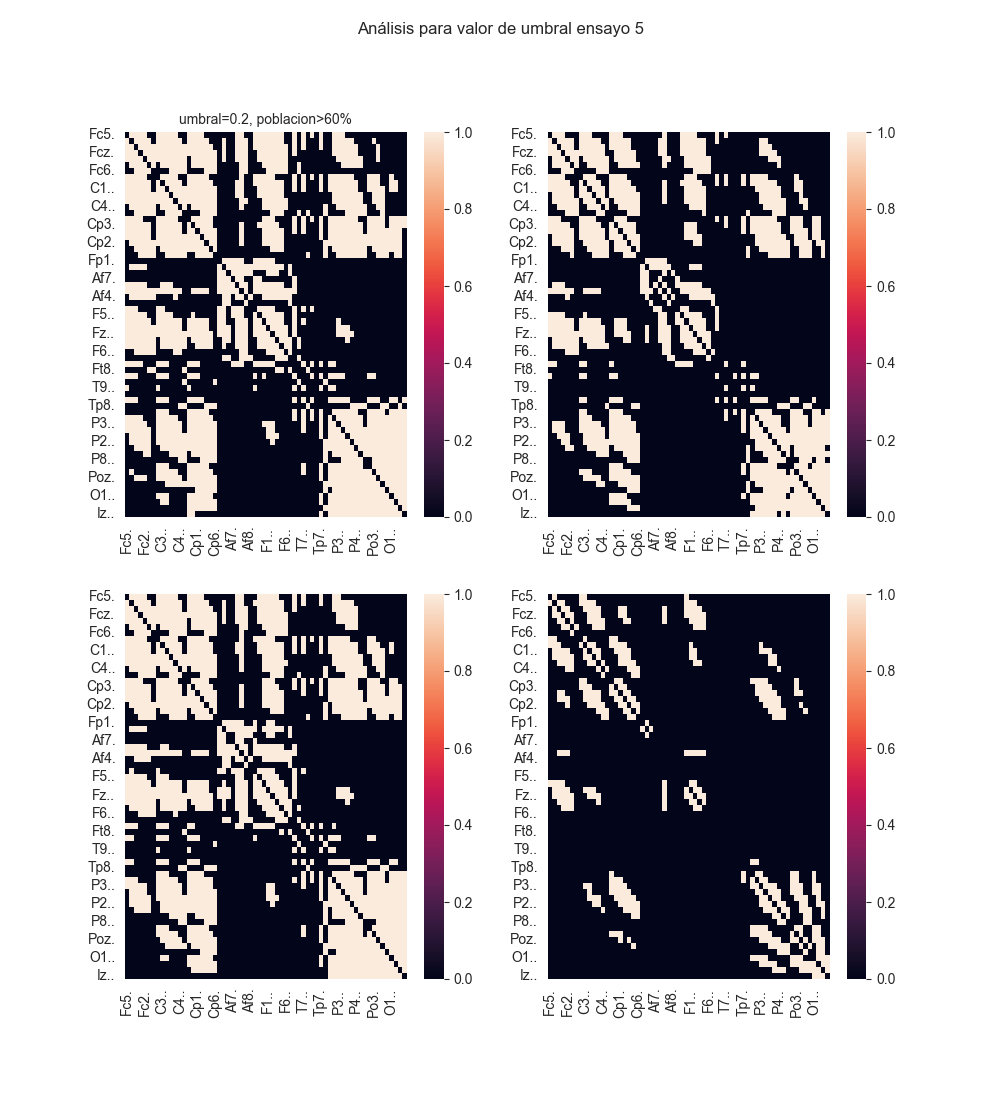

In [47]:
# Análisis para valor de umbral al 60% de la población en el ensayo 5

resultado5_df1 = capsula(ensayos5_dfs, 0.3, 0.6)
resultado5_df2 = capsula(ensayos5_dfs, 0.4, 0.6)
resultado5_df3 = capsula(ensayos5_dfs, 0.3, 0.65)
resultado5_df4 = capsula(ensayos5_dfs, 0.58, 0.7)

fig, axes = plt.subplots(2, 2, figsize=(10, 11))

sns.heatmap(resultado5_df1, ax=axes[0, 0])
sns.heatmap(resultado5_df2, ax=axes[0, 1])
sns.heatmap(resultado5_df3, ax=axes[1, 0])
sns.heatmap(resultado5_df4, ax=axes[1, 1])

# pl('Mapas de calor para comparativa de umbrales ensayo 5 ')
axes[0, 0].set_title('umbral=0.2, poblacion>60%', fontsize=10)
fig.suptitle('Análisis para valor de umbral ensayo 5')

Text(0.5, 0.98, 'Análisis para valor de umbral al 60% de la población en el ensayo 6')

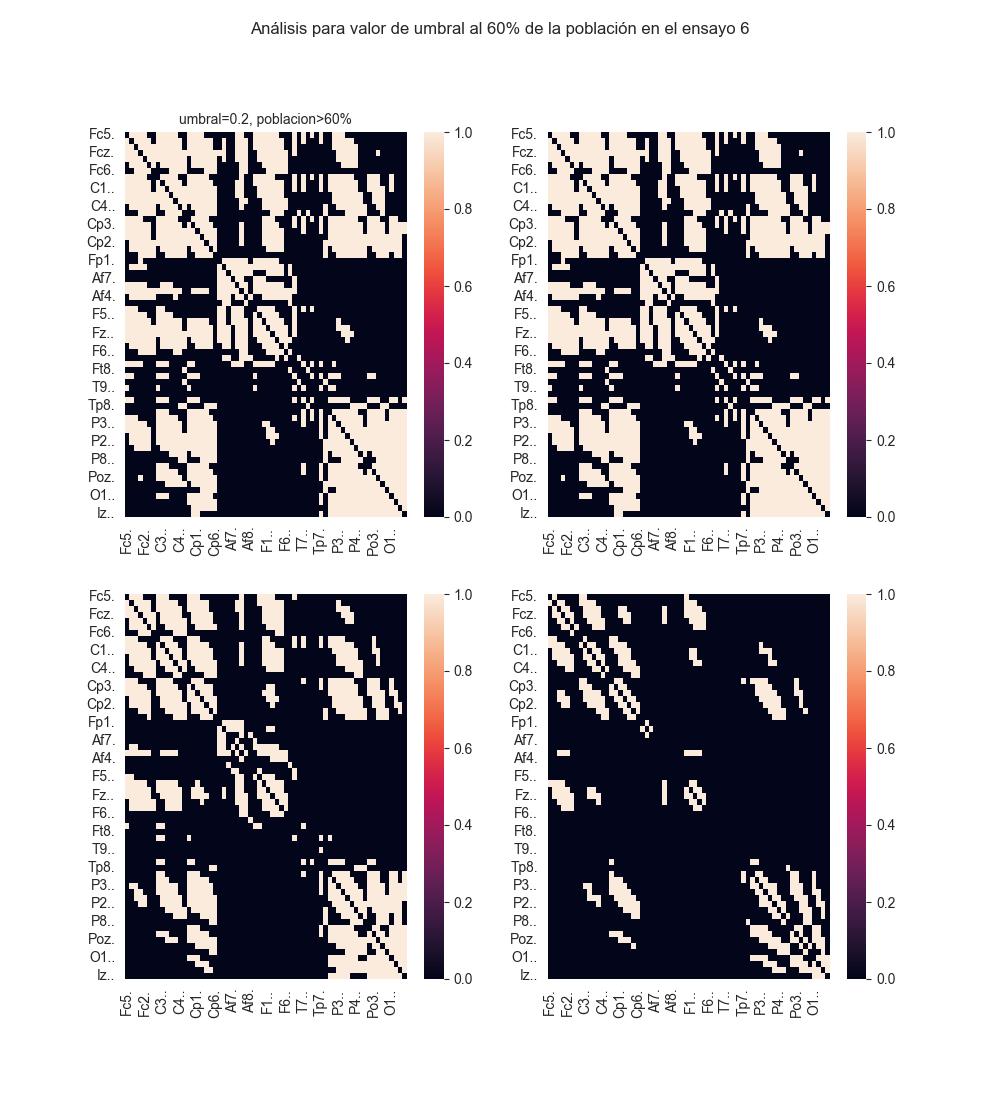

In [48]:
# Análisis para valor de umbral al 60% de la población en el ensayo 6

resultado6_df1 = capsula(ensayos6_dfs, 0.3, 0.6)
resultado6_df2 = capsula(ensayos6_dfs, 0.3, 0.6)
resultado6_df3 = capsula(ensayos6_dfs, 0.4, 0.65)
resultado6_df4 = capsula(ensayos6_dfs, 0.58, 0.7)

fig, axes = plt.subplots(2, 2, figsize=(10, 11))

sns.heatmap(resultado6_df1, ax=axes[0, 0])
sns.heatmap(resultado6_df2, ax=axes[0, 1])
sns.heatmap(resultado6_df3, ax=axes[1, 0])
sns.heatmap(resultado6_df4, ax=axes[1, 1])

axes[0, 0].set_title('umbral=0.2, poblacion>60%', fontsize=10)
fig.suptitle('Análisis para valor de umbral al 60% de la población en el ensayo 6')


# Aqui vamos a poner los de los demas ensayos para solo hacerlo porque ya vimos que buscamos un valor alto de th0.58 y 70%

In [49]:

resultado7_df4  = capsula(ensayos7_dfs,  0.58, 0.7)
resultado8_df4  = capsula(ensayos8_dfs,  0.58, 0.7)
resultado9_df4  = capsula(ensayos9_dfs,  0.58, 0.7)
resultado10_df4 = capsula(ensayos10_dfs, 0.58, 0.7)
resultado11_df4 = capsula(ensayos11_dfs, 0.58, 0.7)
resultado12_df4 = capsula(ensayos12_dfs, 0.58, 0.7)
resultado13_df4 = capsula(ensayos13_dfs, 0.58, 0.7)
resultado14_df4 = capsula(ensayos14_dfs, 0.58, 0.7)


# Generación de resultados

Después del análisis realizado, utilizando los mapas de calor, **para escoger un threshold** adecuado **y un porcentaje** de la población que cumpla dicho umbral; se procederá a generar los resultados.

Resultados a generar:
- Grafo2D
- Grafo3D
- Métricas de grafo
- Gráfico de comunidades con Hub

In [50]:
# Convertir de dataframe a grafo
#Motor
ensayo3_grafo_  = nx.from_pandas_adjacency(resultado3_df4)
ensayo5_grafo_  = nx.from_pandas_adjacency(resultado5_df4)
ensayo7_grafo_  = nx.from_pandas_adjacency(resultado7_df4)
ensayo9_grafo_  = nx.from_pandas_adjacency(resultado9_df4)
ensayo11_grafo_ = nx.from_pandas_adjacency(resultado11_df4)
ensayo13_grafo_ = nx.from_pandas_adjacency(resultado13_df4)

#imaginario
ensayo4_grafo_  = nx.from_pandas_adjacency(resultado4_df4)
ensayo6_grafo_  = nx.from_pandas_adjacency(resultado6_df4)
ensayo8_grafo_  = nx.from_pandas_adjacency(resultado8_df4)
ensayo10_grafo_ = nx.from_pandas_adjacency(resultado10_df4)
ensayo12_grafo_ = nx.from_pandas_adjacency(resultado12_df4)
ensayo14_grafo_ = nx.from_pandas_adjacency(resultado14_df4)


In [51]:
# Cálculo de métricas por ensayo
(clust_coeff_3, path_length_3, small_world_sigma_3, communities_3, 
 modularity_3, betwenness_3, global_eff_3, local_eff_3, degree_dict_3) = metricas_grafo(ensayo3_grafo_)

(clust_coeff_4, path_length_4, small_world_sigma_4, communities_4, 
 modularity_4, betwenness_4, global_eff_4, local_eff_4, degree_dict_4) = metricas_grafo(ensayo4_grafo_)


# Cálculo de métricas por ensayo 6 y 5
(clust_coeff_5, path_length_5, small_world_sigma_5, communities_5,
 modularity_5, betwenness_5, global_eff_5, local_eff_5, degree_dict_5) = metricas_grafo(ensayo5_grafo_)

(clust_coeff_6, path_length_6, small_world_sigma_6, communities_6,
 modularity_6, betwenness_6, global_eff_6, local_eff_6, degree_dict_6) = metricas_grafo(ensayo6_grafo_)

# los demas
(clust_coeff_7, path_length_7, small_world_sigma_7, communities_7,
 modularity_7, betwenness_7, global_eff_7, local_eff_7, degree_dict_7) = metricas_grafo(ensayo7_grafo_)

(clust_coeff_8, path_length_8, small_world_sigma_8, communities_8,
 modularity_8, betwenness_8, global_eff_8, local_eff_8, degree_dict_8) = metricas_grafo(ensayo8_grafo_)

(clust_coeff_9, path_length_9, small_world_sigma_9, communities_9,
 modularity_9, betwenness_9, global_eff_9, local_eff_9, degree_dict_9) = metricas_grafo(ensayo9_grafo_)

(clust_coeff_10, path_length_10, small_world_sigma_10, communities_10,
 modularity_10, betwenness_10, global_eff_10, local_eff_10, degree_dict_10) = metricas_grafo(ensayo10_grafo_)

(clust_coeff_11, path_length_11, small_world_sigma_11, communities_11,
 modularity_11, betwenness_11, global_eff_11, local_eff_11, degree_dict_11) = metricas_grafo(ensayo11_grafo_)

(clust_coeff_12, path_length_12, small_world_sigma_12, communities_12,
 modularity_12, betwenness_12, global_eff_12, local_eff_12, degree_dict_12) = metricas_grafo(ensayo12_grafo_)

(clust_coeff_13, path_length_13, small_world_sigma_13, communities_13,
 modularity_13, betwenness_13, global_eff_13, local_eff_13, degree_dict_13) = metricas_grafo(ensayo13_grafo_)

(clust_coeff_14, path_length_14, small_world_sigma_14, communities_14,
 modularity_14, betwenness_14, global_eff_14, local_eff_14, degree_dict_14) = metricas_grafo(ensayo14_grafo_)


In [52]:
# Construcción de dataframe de coordenadas
eeg_coords = pd.read_csv(coordenadas_csv)
eeg_coords.set_index("canal", drop=True, inplace=True)

In [53]:
# Para esto, se necesitan instalar paquetes que no se vieron en clase, por tanto, es opcional
%matplotlib widget

# Aqui vamos a empezar con las graficas de todo haremos una general de motores e imaginario



In [54]:
ids_motores = [3, 5, 7, 9, 11, 13]
ids_imaginarios = [4, 6, 8, 10, 12, 14]

UMBRAL_TH = 0.58        # Umbral de correlación/conectividad
PORCENTAJE_SUJETOS = 0.7
coords = coordenadas_csv


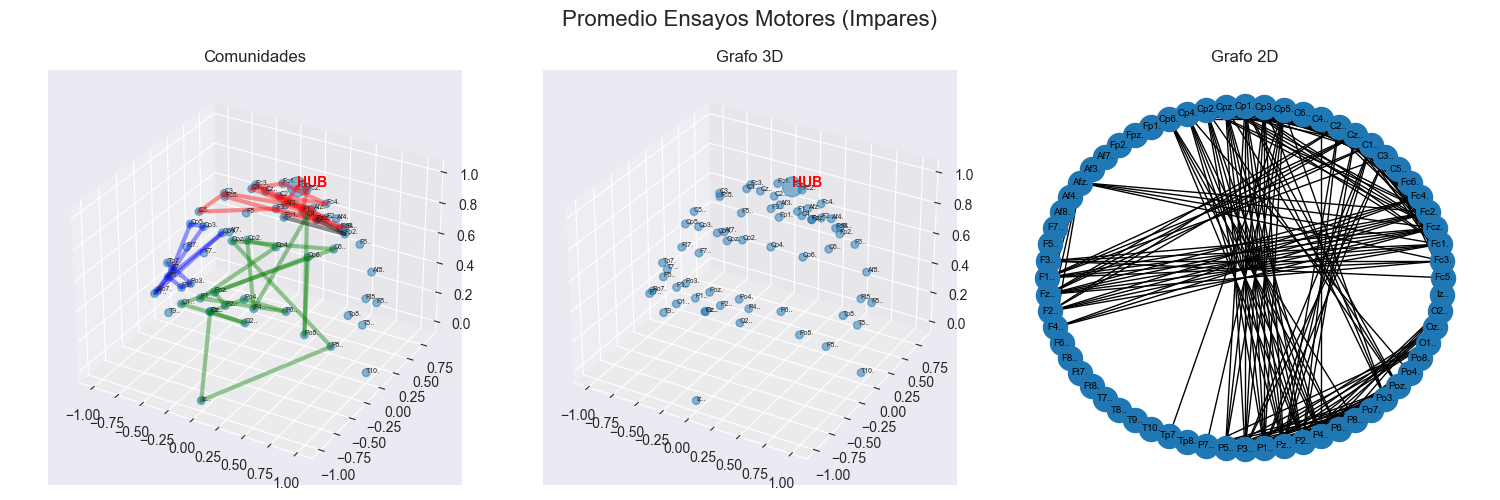

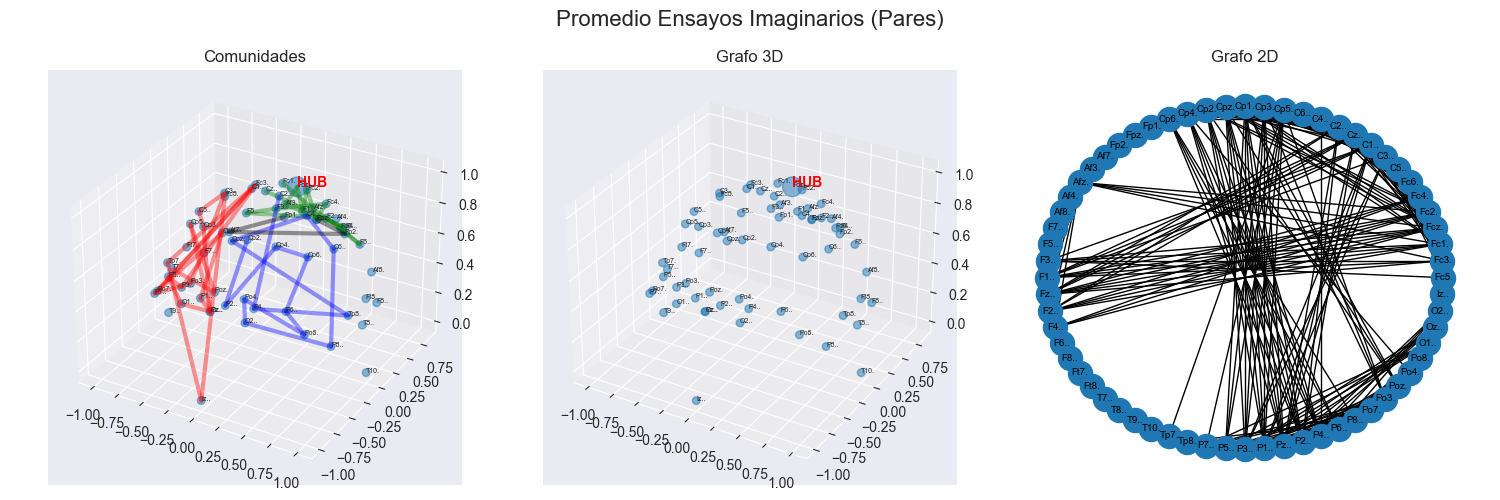

In [55]:
dfs_motores = [globals()[f'resultado{i}_df'] for i in ids_motores]
dfs_imaginarios = [globals()[f'resultado{i}_df'] for i in ids_imaginarios]

# 3. Calcular la matriz promedio para cada grupo
# Al ser DataFrames de pandas con los mismos índices (canales), podemos sumarlos y dividir
df_promedio_motores = sum(dfs_motores) / len(dfs_motores)
df_promedio_imaginarios = sum(dfs_imaginarios) / len(dfs_imaginarios)

# 4. Crear los grafos a partir de las matrices promedio
G_promedio_motores = nx.from_pandas_adjacency(df_promedio_motores)
G_promedio_imaginarios = nx.from_pandas_adjacency(df_promedio_imaginarios)

# 5. Calcular métricas para los grafos promedio (necesarias para los plots de comunidades y 3D)
# Desempaquetamos solo lo que necesitamos: comunidades (índice 3) y betweenness/hub (índice 5)
met_mot = metricas_grafo(G_promedio_motores)
communities_mot = met_mot[3]
hub_mot = met_mot[5][0] # Asumiendo que el Hub es el primer elemento o el dict de centralidad

met_imag = metricas_grafo(G_promedio_imaginarios)
communities_imag = met_imag[3]
hub_imag = met_imag[5][0]

# ---------------------------------------------------------
# 6. Generar Gráficos: PROMEDIO MOTORES
# ---------------------------------------------------------
fig_mot = plt.figure(figsize=(15, 5))
fig_mot.suptitle("Promedio Ensayos Motores (Impares)", fontsize=16)

# Ejes para los 3 gráficos
ax1_mot = fig_mot.add_subplot(1, 3, 1, projection='3d')
ax2_mot = fig_mot.add_subplot(1, 3, 2, projection='3d')
ax3_mot = fig_mot.add_subplot(1, 3, 3)

# Llamada a tus funciones de graficado
grafo_comunidades(communities_mot, hub_mot, eeg_coords, ax1_mot)
ax1_mot.set_title("Comunidades")

grafo3D(eeg_coords, hub_mot, ax2_mot)
ax2_mot.set_title("Grafo 3D")

# Para el 2D pasamos el DataFrame promedio
grafo2D(df_promedio_motores, ax3_mot)
ax3_mot.set_title("Grafo 2D")

plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 7. Generar Gráficos: PROMEDIO IMAGINARIOS
# ---------------------------------------------------------
fig_imag = plt.figure(figsize=(15, 5))
fig_imag.suptitle("Promedio Ensayos Imaginarios (Pares)", fontsize=16)

# Ejes para los 3 gráficos
ax1_imag = fig_imag.add_subplot(1, 3, 1, projection='3d')
ax2_imag = fig_imag.add_subplot(1, 3, 2, projection='3d')
ax3_imag = fig_imag.add_subplot(1, 3, 3)

# Llamada a tus funciones de graficado
grafo_comunidades(communities_imag, hub_imag, eeg_coords, ax1_imag)
ax1_imag.set_title("Comunidades")

grafo3D(eeg_coords, hub_imag, ax2_imag)
ax2_imag.set_title("Grafo 3D")

# Para el 2D pasamos el DataFrame promedio
grafo2D(df_promedio_imaginarios, ax3_imag)
ax3_imag.set_title("Grafo 2D")

plt.tight_layout()
plt.show()

# Los grafos son casi iguales, verifico si no me equivoque  se ven con el mismo hub

In [56]:
diferencia_total = (df_promedio_motores - df_promedio_imaginarios).abs().sum().sum()
print(f"Suma de diferencias: {diferencia_total}")



Suma de diferencias: 16.666666666666668


# Como veo que los grafos son similares quiero ver los electrodos mas chetados (Grado)

In [57]:

dfs_motores = [globals()[f'resultado{i}_df4'] for i in ids_motores if f'resultado{i}_df4' in globals()]
dfs_imaginarios = [globals()[f'resultado{i}_df4'] for i in ids_imaginarios if f'resultado{i}_df4' in globals()]

#  Promediar las Matrices --Al ser DataFrames con los mismos índices  electrodos sum y div
df_prom_motores = sum(dfs_motores) / len(dfs_motores)
df_prom_imaginarios = sum(dfs_imaginarios) / len(dfs_imaginarios)

#Crear Grafos de NetworkX
G_motores = nx.from_pandas_adjacency(df_prom_motores)
G_imaginarios = nx.from_pandas_adjacency(df_prom_imaginarios)

C:\Users\JO\AppData\Local\Temp\ipykernel_36272\507788696.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 8))


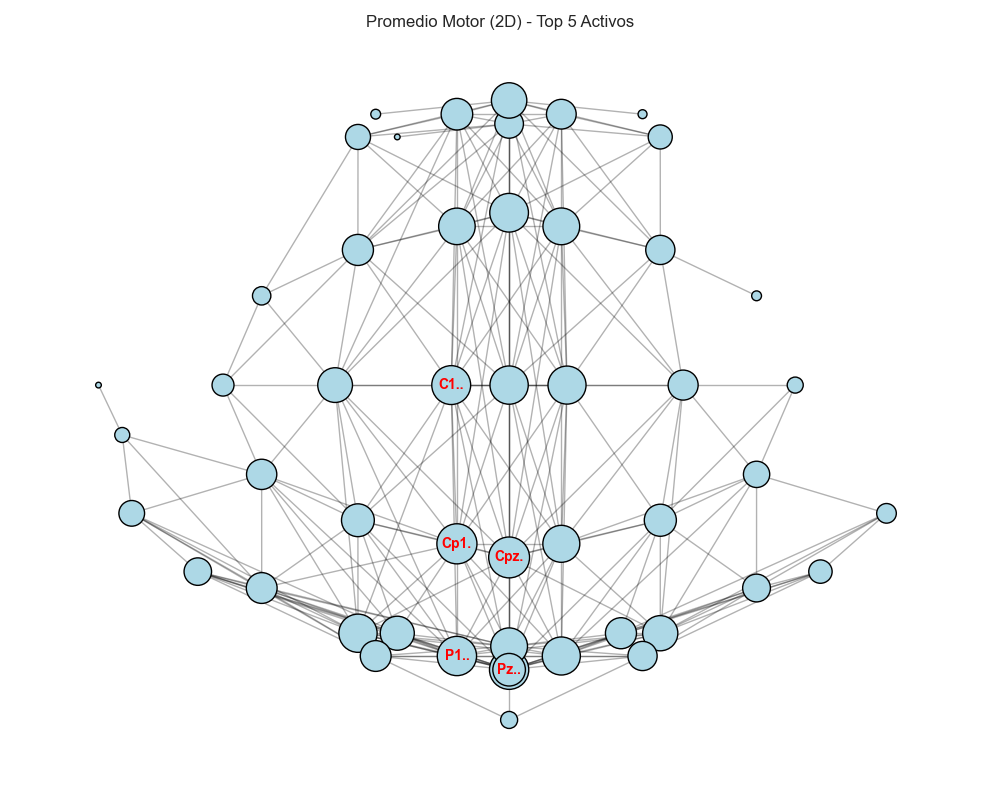

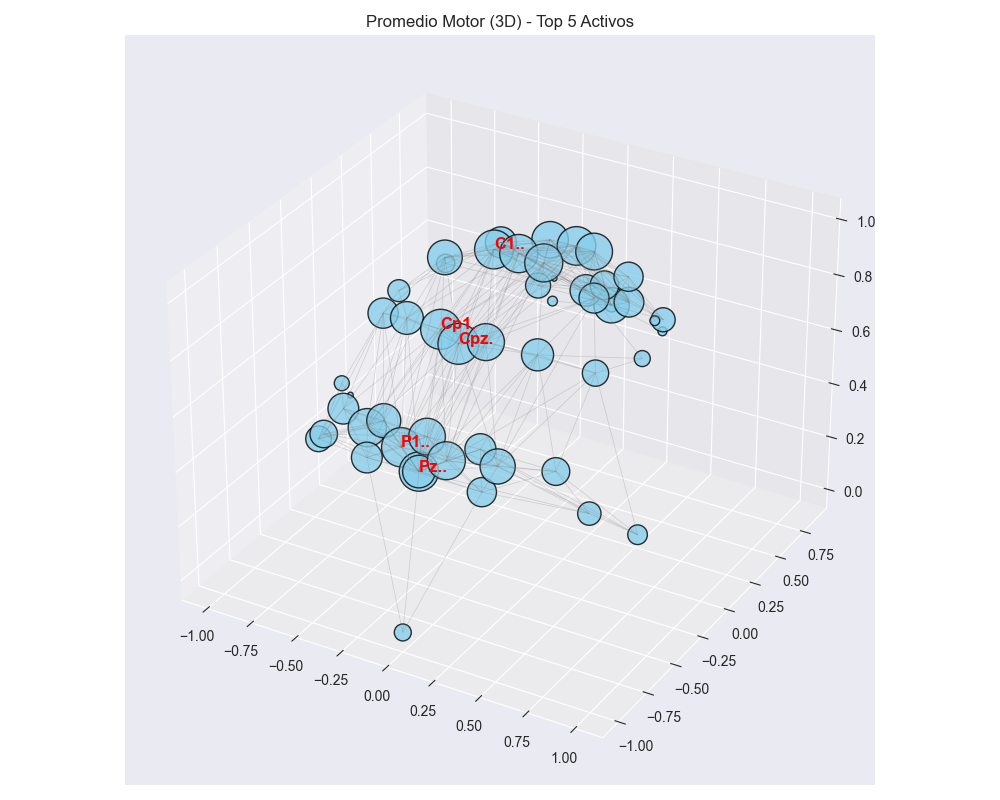

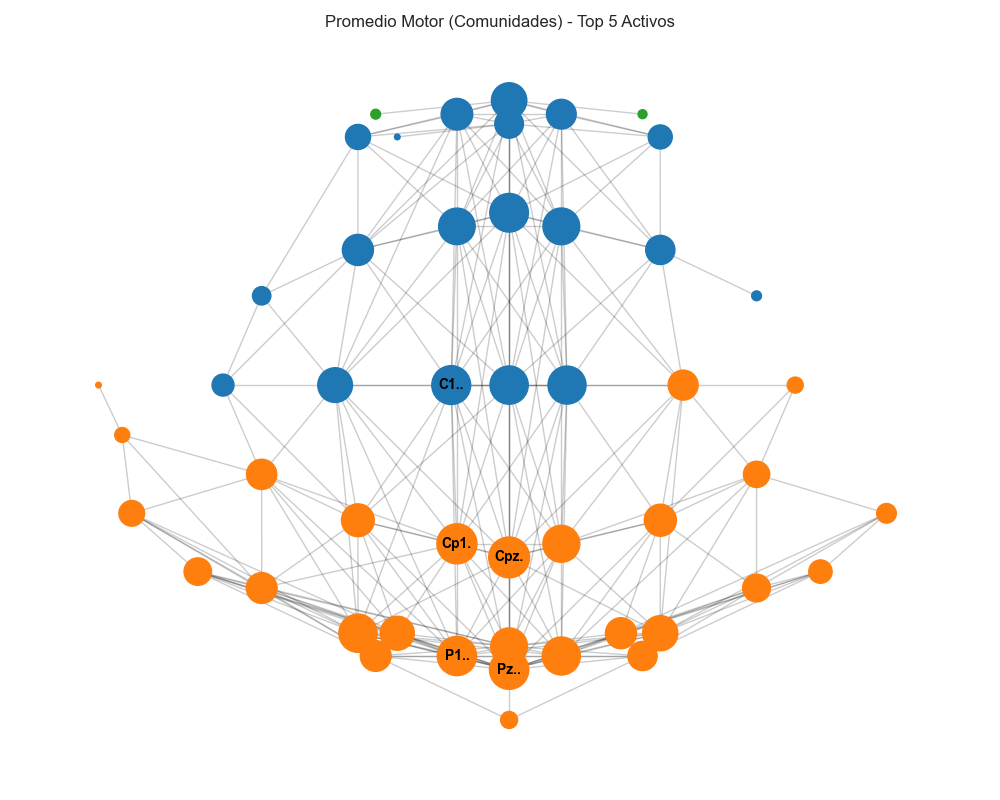

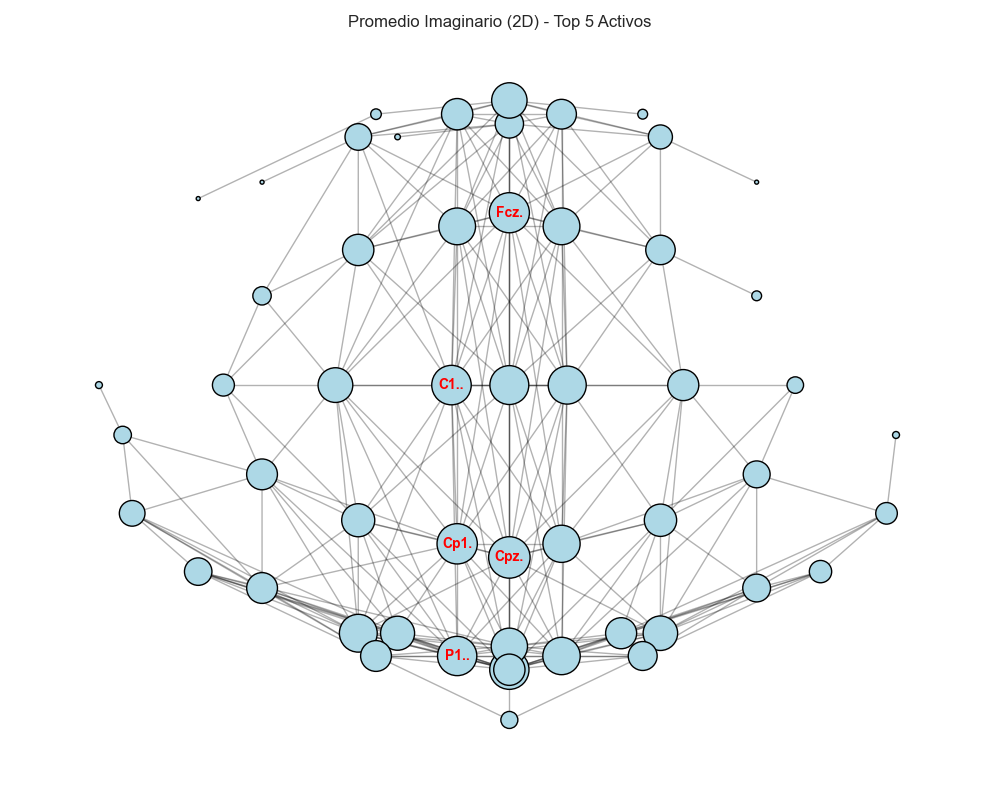

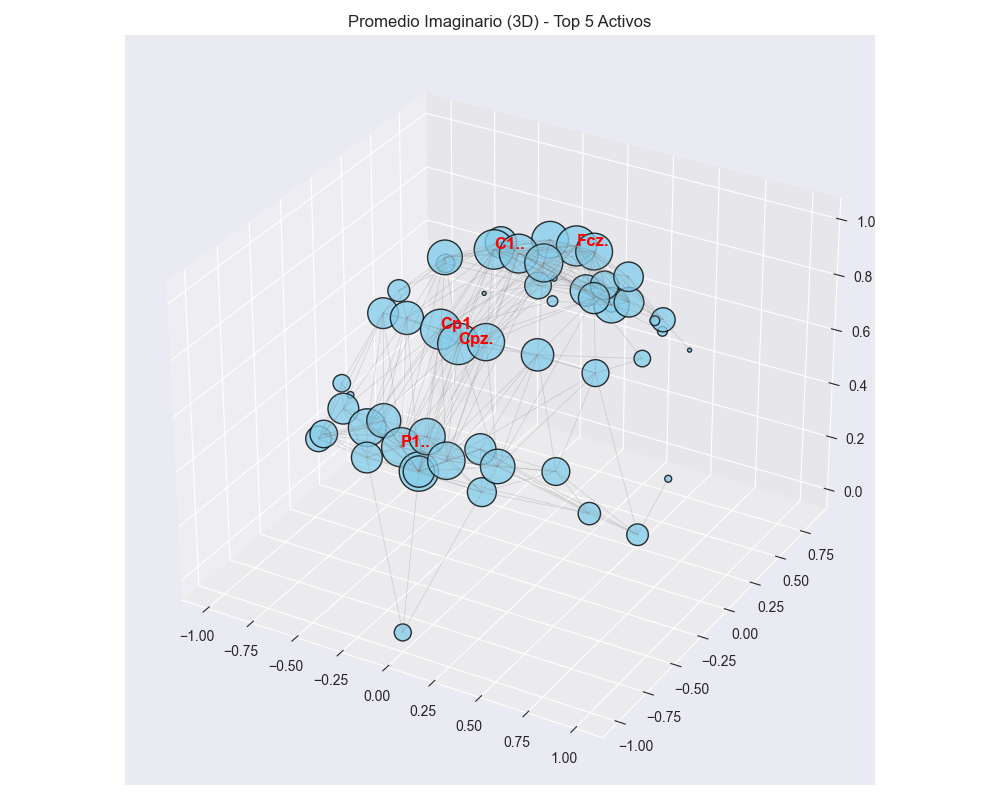

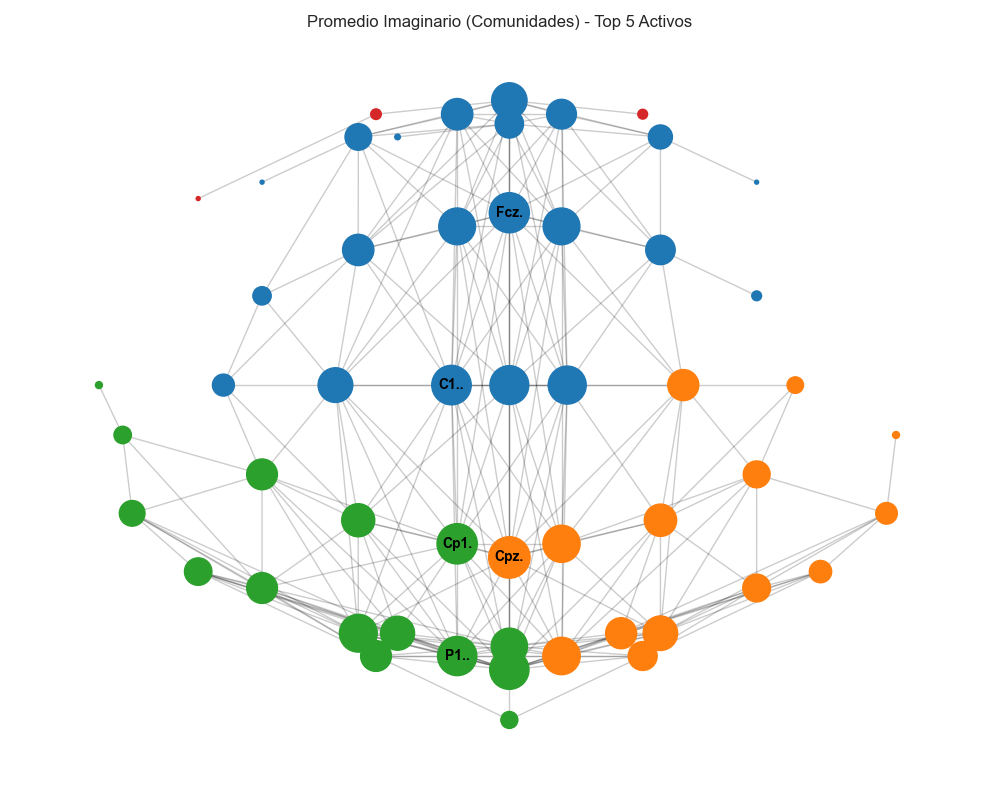

In [58]:
def visualizar_grafo_eeg(G, coords_df, titulo, top_n=7, modo='2d'):
    """
    G: Grafo de NetworkX
    coords_df: DataFrame con coordenadas (índice=nombre nodo)
    modo: '2d', '3d', o 'comunidad'
    top_n: Número de electrodos principales a etiquetar
    """
    plt.figure(figsize=(10, 8))


    pos_3d = {node: (row.iloc[0], row.iloc[1], row.iloc[2]) for node, row in coords_df.iterrows() if node in G.nodes()}
    pos_2d = {node: (coords[0], coords[1]) for node, coords in pos_3d.items()}

   #Calcular Nodos Importantes Top por Grado Ponderado
    grados = dict(G.degree(weight='weight'))
    top_nodos = sorted(grados, key=grados.get, reverse=True)[:top_n]

    # Tamaños de nodos basados en grado
    node_sizes = [grados[n] * 50 for n in G.nodes()]

    #Lógica de Graficado
    if modo == '3d':
        ax = plt.gcf().add_subplot(111, projection='3d')

        # Extraer coordenadas
        xs = [pos_3d[n][0] for n in G.nodes()]
        ys = [pos_3d[n][1] for n in G.nodes()]
        zs = [pos_3d[n][2] for n in G.nodes()]

        # Dibujar nodos
        ax.scatter(xs, ys, zs, s=node_sizes, c='skyblue', alpha=0.8, edgecolors='k')

        # Dibujar aristas (solo las fuertes para no saturar)
        for (u, v, d) in G.edges(data=True):
            if d.get('weight', 0) > 0.1: # Filtro visual opcional
                x = [pos_3d[u][0], pos_3d[v][0]]
                y = [pos_3d[u][1], pos_3d[v][1]]
                z = [pos_3d[u][2], pos_3d[v][2]]
                ax.plot(x, y, z, c='gray', alpha=0.3, linewidth=0.5)

        # Etiquetas solo para Top N
        for n in top_nodos:
            ax.text(pos_3d[n][0], pos_3d[n][1], pos_3d[n][2], n, fontsize=12, fontweight='bold', color='red')

        ax.set_title(f"{titulo} (3D) - Top {top_n} Activos")

    elif modo == 'comunidad':
        ax = plt.gca()
        # Detectar comunidades
        partition = community_louvain.best_partition(G)
        colors = [partition[n] for n in G.nodes()]

        # Dibujar
        nx.draw_networkx_nodes(G, pos_2d, node_size=node_sizes, node_color=colors, cmap=plt.cm.tab10, ax=ax)
        nx.draw_networkx_edges(G, pos_2d, alpha=0.2, ax=ax)

        # Etiquetas Top N
        labels = {n: n for n in top_nodos}
        nx.draw_networkx_labels(G, pos_2d, labels, font_size=10, font_color='black', font_weight='bold', ax=ax)

        ax.set_title(f"{titulo} (Comunidades) - Top {top_n} Activos")
        ax.axis('off')

    else: # Modo 2D estándar
        ax = plt.gca()
        nx.draw_networkx_nodes(G, pos_2d, node_size=node_sizes, node_color='lightblue', edgecolors='k', ax=ax)
        nx.draw_networkx_edges(G, pos_2d, alpha=0.3, ax=ax)

        # Etiquetas Top N
        labels = {n: n for n in top_nodos}
        nx.draw_networkx_labels(G, pos_2d, labels, font_size=10, font_color='red', font_weight='bold', ax=ax)

        ax.set_title(f"{titulo} (2D) - Top {top_n} Activos")
        ax.axis('off')

    plt.tight_layout()
    plt.show()


# 1. Grupo MOTOR
visualizar_grafo_eeg(G_motores, eeg_coords, "Promedio Motor", modo='2d', top_n=5)
visualizar_grafo_eeg(G_motores, eeg_coords, "Promedio Motor", modo='3d', top_n=5)
visualizar_grafo_eeg(G_motores, eeg_coords, "Promedio Motor", modo='comunidad', top_n=5)

# 2. Grupo IMAGINARIO
visualizar_grafo_eeg(G_imaginarios, eeg_coords, "Promedio Imaginario", modo='2d', top_n=5)
visualizar_grafo_eeg(G_imaginarios, eeg_coords, "Promedio Imaginario", modo='3d', top_n=5)
visualizar_grafo_eeg(G_imaginarios, eeg_coords, "Promedio Imaginario", modo='comunidad', top_n=5)

Imaginario
Fcz, C1 , cp1, cpz, p1

Motor:
Pz,p1,cp1,cpz,c1

Como se ve en la literatura el movimiento imaginario es mas frontal , sin perder la zona de activacion de la corteza motora que esta por cpz y p1, aunque deberia ser mas posterior pero pienso que por los ensayos que fueron los pies , tienen mas fuerza de disparo.
Para el imaginario el Fcz dice todo porque creo que aunque para las bci el movimiento motor da mejores resultados si se ve una distribucion mas homogenea que la motora, sirviendo mas para discriminar comando para una bci.
Tambien se ve activada la zona sonsoriomotora como se decia en la literatura , por esta retroalimentacin sensorial de mover un brazo todo el tiempo el cuerpo tiene que saber donde esta, por la propiocepcion recluta las fibras sensorales
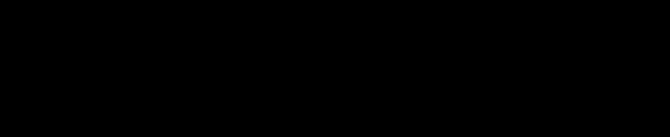
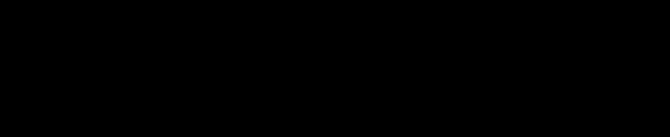
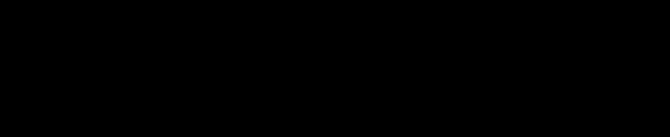
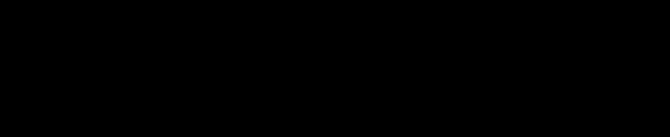
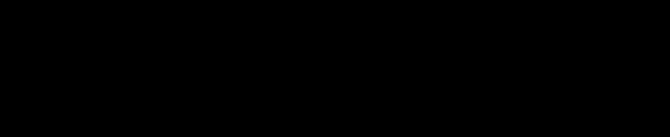